# Chapter 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax


def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

In [21]:
# data prep
x0 = [ 1.78862847,  0.09649747, -0.2773882 , -3.08274148, -3.04381817,
       -1.31386475, -2.11868196, -2.94996636, -3.54535995,  0.98236743,
       -1.18504653, -1.51385164, -4.02378514,  0.62524497, -3.76883635,
        0.74505627, -1.24412333, -0.80376609, -0.92379202,  1.12397796]
x1 = [0.43650985, -1.8634927 , -0.35475898,  2.37299932,  2.52278197,
        0.88462238,  4.70957306,  2.59532259,  1.45352268, -1.10106763,
       -0.2056499 ,  3.23671627,  2.2870068 , -0.16051336,  2.76996928,
        1.97611078, -0.62641691, -2.41908317, -1.02387576, -0.13191423]

X = np.array(list(zip(x0, x1)))

y = np.array([[-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1]]).reshape(20,)

print(X.shape, y.shape)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

(20, 2) (20,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

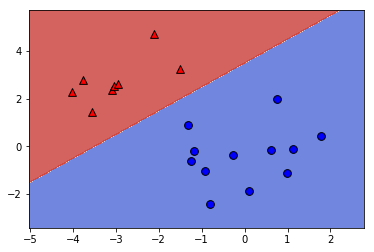

Number of errors: 0


In [44]:
# Set the coefficients
model.coef_ = np.array([[-1,1]])
model.intercept_ = np.array([-3.5])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

## Loss Function

In [52]:
# data prep
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

from urllib.request import urlretrieve
file = 'boston.csv'
url = 'https://assets.datacamp.com/production/course_1939/datasets/' + file
urlretrieve(url, file)
boston = pd.read_csv(file)

X = boston.drop('MEDV', axis='columns').as_matrix()
y = boston.MEDV.as_matrix()
print(X.shape, y.size)

(506, 13) 506


In [54]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_pred - y_i_true)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28967063e-02  4.87152314e-02 -4.05609127e-03  2.85400082e+00
 -2.86853360e+00  5.92816124e+00 -7.26935667e-03 -9.68515521e-01
  1.71155934e-01 -9.39658274e-03 -3.92187445e-01  1.49055006e-02
 -4.16303812e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


## Loss Function Diagrams

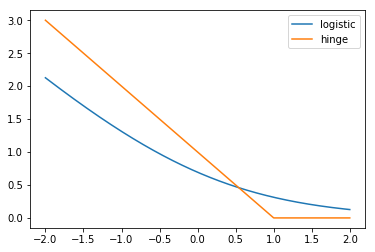

In [56]:
# Mathematical functions for logistic and hinge losses
# Feel free to ignore if you're not interested
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [76]:
# data prep
from sklearn.preprocessing import StandardScaler

file = 'wbc.csv'
url = 'https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/' + file
urlretrieve(url, file)
wbc = pd.read_csv(file)
print(wbc.info())
X = wbc.drop(['diagnosis', 'Unnamed: 32'], axis='columns').as_matrix()
y = wbc.diagnosis.apply(lambda x: -1.0 if x == "M" else 1.0).as_matrix()

ss = StandardScaler()
X = ss.fit_transform(X)
X = X[:,:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [77]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 0.39826935  3.38516219 -1.68891317  1.04221825 -9.29304334 -1.06214506
  0.66325195 -0.69423229 -2.46363894 -0.54041331]
[[ 0.39385316  2.60754061 -1.68922335  1.89050119 -9.31622027 -1.05018316
   0.61205085 -0.69220694 -2.48794605 -0.53793437]]
